## STEP 02: DATA PREPROCESSING 

### 1) Load the dataset


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform, pdist

In [5]:
data = pd.read_excel("dataset/dim_reduct_v1.xlsx")
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46
0,3.849137,1.725248,-0.497857,-7.471147,-1.358693,20.679510,-7.156252,-5.922557,11.775078,12.805041,...,5.875273,-8.201165,-7.349066,8.400065,-3.574463,-3.972343,-7.698369,-12.547030,-11.175359,-7.300101
1,1.849205,5.725294,1.500639,-2.476777,0.652022,-7.295257,6.844819,2.074821,-0.229143,-3.202466,...,-16.125269,-8.199851,-7.349889,-15.599984,-7.573024,-7.974543,0.300784,-0.549105,-11.175287,-9.298986
2,-0.145611,1.724171,-2.497465,51.531324,-3.360381,-1.306102,22.861799,2.083873,-12.225997,-3.200507,...,-4.125097,-0.199366,-11.350312,0.399975,2.426235,-5.974534,-9.699327,9.449166,-11.174942,-5.299410
3,7.846525,11.725204,-0.498598,5.521087,-1.345795,6.704815,-3.156028,-3.918687,7.775375,6.795616,...,5.875156,9.800418,-13.349669,2.400016,-7.574656,6.024878,10.297886,1.449433,-19.174877,0.700456
4,3.849137,1.724367,3.495523,-4.471270,-1.345795,6.692408,-7.141126,-9.918679,-2.226091,-7.203657,...,-10.125281,-10.203094,-15.349944,-7.599953,-7.573840,-1.974245,-9.698324,-4.543951,-11.175121,-9.298986


### 2) Calculate the variables distances

In [6]:
# Compute correlation matrix
corr_matrix = data.corr().values

# Convert correlation to distance: distance = 1 - |correlation|
distance_matrix = 1 - np.abs(corr_matrix)

# Make sure it's a valid condensed distance matrix
distance_matrix = np.nan_to_num(distance_matrix)  # Handle NaN if any

In [7]:
distance_matrix

array([[0.        , 0.44176229, 0.78444396, ..., 0.99689007, 0.96375043,
        0.93811592],
       [0.44176229, 0.        , 0.91347969, ..., 0.8709086 , 0.81326087,
        0.8788283 ],
       [0.78444396, 0.91347969, 0.        , ..., 0.8319527 , 0.78699514,
        0.8820569 ],
       ...,
       [0.99689007, 0.8709086 , 0.8319527 , ..., 0.        , 0.74351926,
        0.62775743],
       [0.96375043, 0.81326087, 0.78699514, ..., 0.74351926, 0.        ,
        0.71739251],
       [0.93811592, 0.8788283 , 0.8820569 , ..., 0.62775743, 0.71739251,
        0.        ]], shape=(46, 46))

In [8]:
# Perform hierarchical clustering
Z = linkage(squareform(distance_matrix), method='average')  # 'average', 'complete', 'ward'

### 3) Hierarchical Clustering Visualization: Dendogram

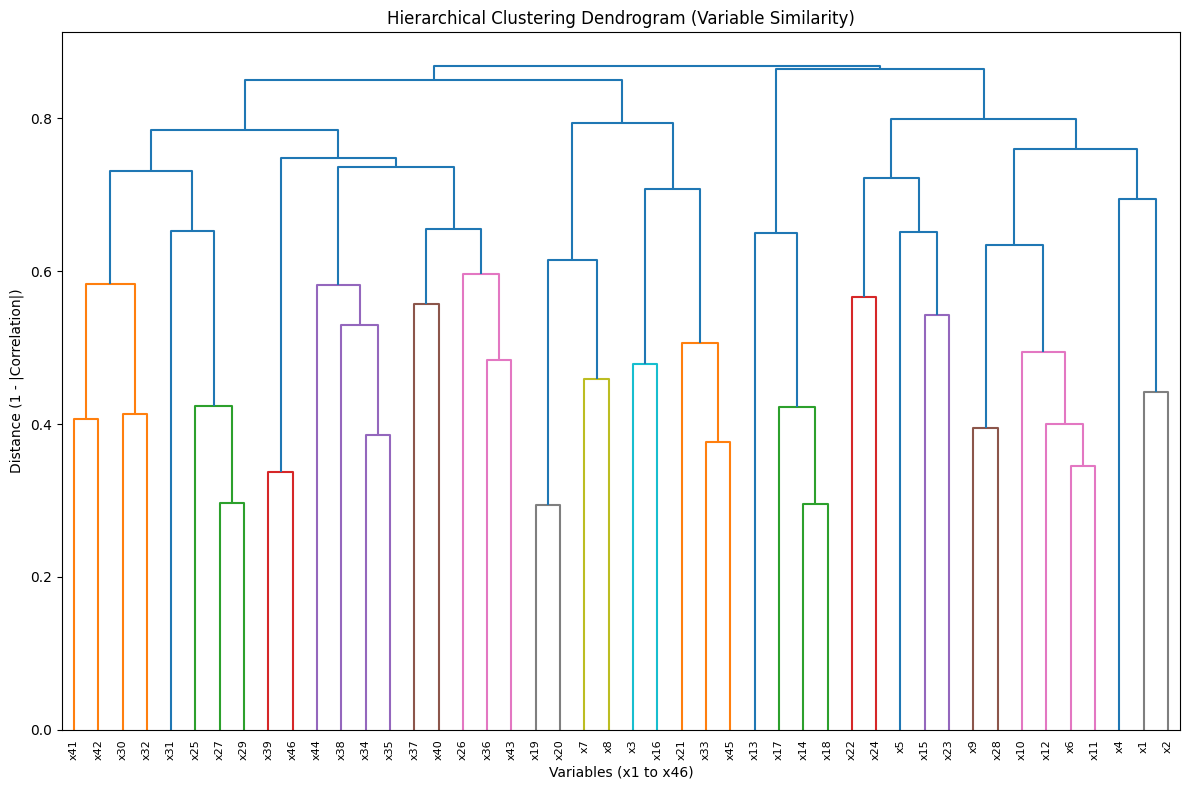

In [9]:
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=data.columns, orientation='top', leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Variable Similarity)")
plt.xlabel("Variables (x1 to x46)")
plt.ylabel("Distance (1 - |Correlation|)")
plt.tight_layout()
plt.show()

### 4) Dimensionality Reduction through AutoEncoders

In [62]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46
0,3.849137,1.725248,-0.497857,-7.471147,-1.358693,20.679510,-7.156252,-5.922557,11.775078,12.805041,...,5.875273,-8.201165,-7.349066,8.400065,-3.574463,-3.972343,-7.698369,-12.547030,-11.175359,-7.300101
1,1.849205,5.725294,1.500639,-2.476777,0.652022,-7.295257,6.844819,2.074821,-0.229143,-3.202466,...,-16.125269,-8.199851,-7.349889,-15.599984,-7.573024,-7.974543,0.300784,-0.549105,-11.175287,-9.298986
2,-0.145611,1.724171,-2.497465,51.531324,-3.360381,-1.306102,22.861799,2.083873,-12.225997,-3.200507,...,-4.125097,-0.199366,-11.350312,0.399975,2.426235,-5.974534,-9.699327,9.449166,-11.174942,-5.299410
3,7.846525,11.725204,-0.498598,5.521087,-1.345795,6.704815,-3.156028,-3.918687,7.775375,6.795616,...,5.875156,9.800418,-13.349669,2.400016,-7.574656,6.024878,10.297886,1.449433,-19.174877,0.700456
4,3.849137,1.724367,3.495523,-4.471270,-1.345795,6.692408,-7.141126,-9.918679,-2.226091,-7.203657,...,-10.125281,-10.203094,-15.349944,-7.599953,-7.573840,-1.974245,-9.698324,-4.543951,-11.175121,-9.298986


In [63]:
data.shape

(40, 46)

### Autoencoder model

In [103]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU

In [ ]:
def autoencoder_compressor(data, input_dim, output_dim):
    # Architecture with intermediate layer and LeakyReLU
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(2)(input_layer)  # Intermediate layer
    encoded = LeakyReLU(negative_slope=0.1)(encoded)  # Avoid dead neurons
    encoded = Dense(output_dim, activation='linear')(encoded)  # Final bottleneck
    
    # Decoder
    decoded = Dense(input_dim, activation='linear')(encoded)
    
    # Model
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(data, data, epochs=10, batch_size=5, verbose=0)  # Increased epochs
    
    # Encoder (for dimensionality reduction)
    encoder = Model(input_layer, encoded)
    result = encoder.predict(data)
    return result

#### Dimensionality reduction using hierarchical clusters

In [113]:
data_compressed = []

In [114]:
subgroups = {
    "group01": ["x41", "x42", "x30", "x32"],
    "group02": ["x31", "x25", "x27", "x29"],
    "group03": ["x39", "x46"],
    "group04": ["x44", "x38", "x34", "x35"],
    "group05": ["x37","x40", "x26", "x36", "x43"],
    "group06": ["x19", "x20", "x7", "x8"],
    "group07": ["x3", "x16", "x21", "x33", "x45"],
    "group08": ["x13", "x17", "x14", "x18"],
    "group09": ["x22", "x24","x5", "x15", "x23"],
    "group10": ["x9", "x28", "x10", "x12", "x6", "x11"],
    "group11": ["x4", "x1", "x2"]
}

In [115]:
subgroups.items()

dict_items([('group01', ['x41', 'x42', 'x30', 'x32']), ('group02', ['x31', 'x25', 'x27', 'x29']), ('group03', ['x39', 'x46']), ('group04', ['x44', 'x38', 'x34', 'x35']), ('group05', ['x37', 'x40', 'x26', 'x36', 'x43']), ('group06', ['x19', 'x20', 'x7', 'x8']), ('group07', ['x3', 'x16', 'x21', 'x33', 'x45']), ('group08', ['x13', 'x17', 'x14', 'x18']), ('group09', ['x22', 'x24', 'x5', 'x15', 'x23']), ('group10', ['x9', 'x28', 'x10', 'x12', 'x6', 'x11']), ('group11', ['x4', 'x1', 'x2'])])

In [116]:
data[subgroups["group01"]].head()

,x41,x42,x30,x32
0,-3.574463,-3.972343,-5.075038,-7.999031
1,-7.573024,-7.974543,-1.072523,-9.998484
2,2.426235,-5.974534,-7.074185,0.000340
3,-7.574656,6.024878,-11.074297,2.000313
4,-7.573840,-1.974245,8.926775,0.000652


In [117]:
data[subgroups["group01"]].shape

(40, 4)

In [118]:
def compression_data(data, subgroups):
    data_compressed = np.empty((data.shape[0], 0))  
    for key, val in subgroups.items():
        aux = []        
        aux = autoencoder_compressor(data = data[val], input_dim = len(val), output_dim = 1)
        aux = np.array(aux).reshape(-1, 1)        
        data_compressed = np.hstack([data_compressed, aux])
        print("The " + key + " compression is done ...")
    return data_compressed

In [119]:
final_table = compression_data(data, subgroups)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
The group01 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
The group02 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
The group03 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
The group04 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
The group05 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
The group06 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
The group07 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
The group08 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
The group09 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
The group10 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
The group11 compression is done ...


In [120]:
final_table

array([[-1.24217011e-01,  1.91959441e-01,  1.47931659e+00,
         7.59879065e+00, -1.96272343e-01,  2.25299501e+00,
         5.74844301e-01, -1.43655844e+01, -8.31802666e-01,
        -1.29455352e+00,  6.70107651e+00],
       [-4.78797220e-02,  2.10094118e+00,  1.69156516e+00,
         4.81534079e-02,  1.06465769e+00, -2.14004016e+00,
         2.69398403e+00, -1.59328976e+01,  4.62201566e-01,
         1.96637878e+01,  6.23486280e+00],
       [-1.00621796e+00, -6.44586086e-01,  1.61195862e+00,
        -4.25095701e+00,  3.53330791e-01, -1.49556184e+00,
        -1.40432453e+00,  1.85087979e+00, -1.90050375e+00,
        -1.50973260e+00, -1.45985174e+01],
       [-4.39011514e-01, -3.74805713e+00,  1.14748132e+00,
        -7.02073097e-01, -4.26319695e+00,  3.30244350e+00,
        -2.86941624e+00, -2.27783794e+01,  6.60776198e-01,
         7.72006989e+00,  1.02823219e+01],
       [ 7.85455346e-01,  1.35585654e+00,  2.38137722e+00,
         3.45764804e+00,  1.73536706e+00,  9.09480762e+00,
  

In [129]:
# convert to pandas dataframe
frame_dataset = pd.DataFrame(final_table)

In [130]:
frame_dataset.columns = ["x1*", "x2*", "x3*", "x4*", "x5*", 
                         "x6*", "x7*", "x8*", "x9*", "x10*", "x11*"]

In [131]:
frame_dataset.head()

,x1*,x2*,x3*,x4*,x5*,x6*,x7*,x8*,x9*,x10*,x11*
0,-0.124217,0.191959,1.479317,7.598791,-0.196272,2.252995,0.574844,-14.365584,-0.831803,-1.294554,6.701077
1,-0.047880,2.100941,1.691565,0.048153,1.064658,-2.140040,2.693984,-15.932898,0.462202,19.663788,6.234863
2,-1.006218,-0.644586,1.611959,-4.250957,0.353331,-1.495562,-1.404325,1.850880,-1.900504,-1.509733,-14.598517
3,-0.439012,-3.748057,1.147481,-0.702073,-4.263197,3.302444,-2.869416,-22.778379,0.660776,7.720070,10.282322
4,0.785455,1.355857,2.381377,3.457648,1.735367,9.094808,2.773776,-22.135305,-1.914031,-1.160654,5.341554


In [132]:
print("Final dimensionality: ", frame_dataset.shape)

Final dimensionality:  (40, 11)


## STEP 03: MACHINE LEARNING TASK

#### 3.1) Data preparing

In [133]:
dataset2 = pd.read_excel("dataset/original_health_data.xlsx")
dataset2.head()

,Unnamed: 0,28,29,30,31,32,33,34,35,36,...,113,114,115,116,117,118,119,Kerdo,Starr,Robinson
0,patient 1,1.10,74,1.26,80,0.68,80,0.70,87,0.60,...,78,0.90,82,0.60,80,0.96,78,18.9,75.04,74.0
1,patient 2,1.10,76,1.30,76,1.00,78,1.30,82,1.20,...,70,0.90,70,0.66,80,0.80,80,-2.9,58.20,78.2
2,patient 3,0.48,78,0.38,80,0.60,82,0.16,28,0.49,...,80,0.90,60,0.95,80,0.85,76,-6.1,67.91,79.2
3,patient 4,1.40,70,1.23,70,0.84,80,1.50,74,1.30,...,60,0.96,68,1.00,88,0.85,70,3.2,57.52,68.2
4,patient 5,1.10,74,0.54,80,2.10,76,0.70,84,1.30,...,80,0.66,74,0.80,80,0.80,80,-20.7,58.36,63.8


In [135]:
index_predictors = dataset2.loc[:, ["Kerdo", "Starr", "Robinson"]]
index_predictors.head()

,Kerdo,Starr,Robinson
0,18.9,75.04,74.0
1,-2.9,58.20,78.2
2,-6.1,67.91,79.2
3,3.2,57.52,68.2
4,-20.7,58.36,63.8


In [136]:
data_indexes = pd.concat([frame_dataset, index_predictors], axis = 1)
data_indexes.head()

,x1*,x2*,x3*,x4*,x5*,x6*,x7*,x8*,x9*,x10*,x11*,Kerdo,Starr,Robinson
0,-0.124217,0.191959,1.479317,7.598791,-0.196272,2.252995,0.574844,-14.365584,-0.831803,-1.294554,6.701077,18.9,75.04,74.0
1,-0.047880,2.100941,1.691565,0.048153,1.064658,-2.140040,2.693984,-15.932898,0.462202,19.663788,6.234863,-2.9,58.20,78.2
2,-1.006218,-0.644586,1.611959,-4.250957,0.353331,-1.495562,-1.404325,1.850880,-1.900504,-1.509733,-14.598517,-6.1,67.91,79.2
3,-0.439012,-3.748057,1.147481,-0.702073,-4.263197,3.302444,-2.869416,-22.778379,0.660776,7.720070,10.282322,3.2,57.52,68.2
4,0.785455,1.355857,2.381377,3.457648,1.735367,9.094808,2.773776,-22.135305,-1.914031,-1.160654,5.341554,-20.7,58.36,63.8


In [138]:
data_indexes.columns

Index(['x1*', 'x2*', 'x3*', 'x4*', 'x5*', 'x6*', 'x7*', 'x8*', 'x9*', 'x10*',
       'x11*', 'Kerdo', 'Starr', 'Robinson'],
      dtype='object')

#### 3.2) Data Exploring

In [146]:
import seaborn as sbn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [147]:
def hist_frequencies(data, bins):
    # calculate the nrows and ncols for plots
    numeric_cols = data.columns
    ncol_plots = 3
    nrow_plots = (len(numeric_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()    
    
    for i, col in enumerate(numeric_cols):
        sbn.histplot(data[col], color = "blue", bins = bins, ax = axs[i])
        axs[i].set_title("Histogram of frequencies for " + col)
        plt.xlabel(col)
        plt.ylabel("Frequencies")
    plt.tight_layout()
    plt.show()

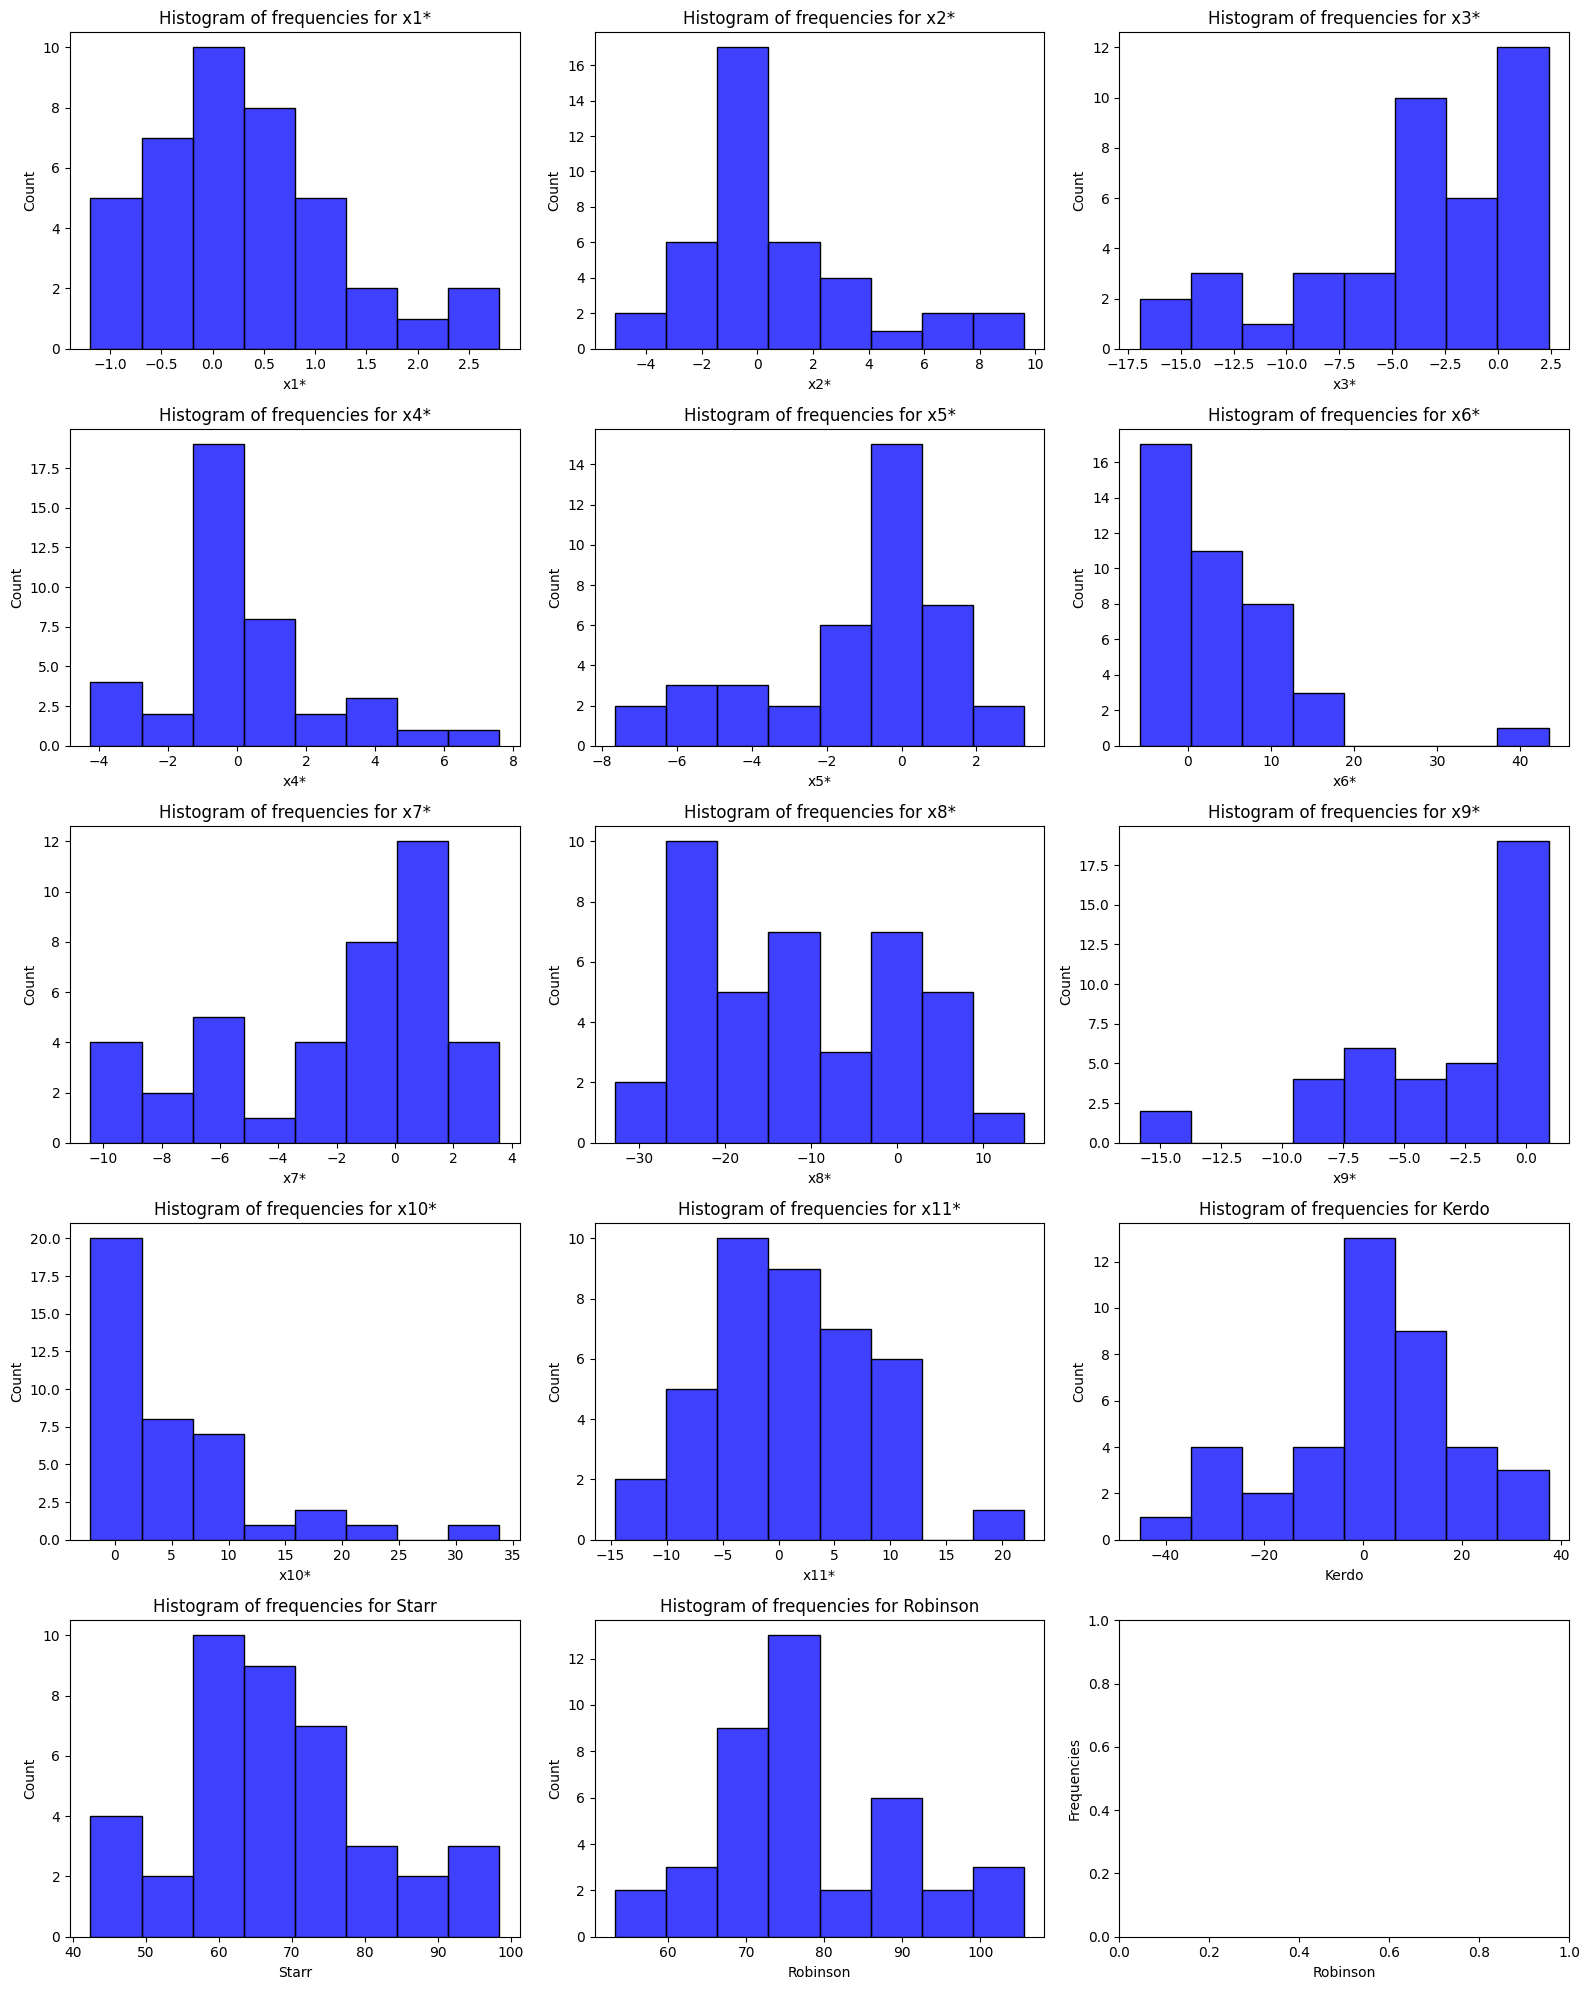

In [143]:
hist_frequencies(data_indexes, bins = 8)

### 3.3) Data Processing for Kerdo Index

Split X and Y

In [229]:
X = frame_dataset
y_kerdo = data_indexes.loc[:, ["Kerdo"]]
y_starr = data_indexes.loc[:, ["Starr"]]
y_robinson = data_indexes.loc[:, ["Robinson"]]

In [230]:
print("Dim-X: ", X.shape)
print("Dim y-kerdo: ", y_kerdo.shape)
print("Dim y-starr: ", y_starr.shape)
print("Dim y-robinson: ", y_robinson.shape)

Dim-X:  (40, 11)
Dim y-kerdo:  (40, 1)
Dim y-starr:  (40, 1)
Dim y-robinson:  (40, 1)


Split train and test set

In [231]:
# split train and test set
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y_kerdo, test_size = 10, random_state = 0)

print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (30, 11)
Y-train:  30
X-test dim:  (10, 11)
Y-test:  10


In [232]:
x_train

,x1*,x2*,x3*,x4*,x5*,x6*,x7*,x8*,x9*,x10*,x11*
27,0.465620,0.365593,-2.865765,-0.923348,-7.639185,-0.266273,-5.322941,1.738992,-6.290252,-1.832157,2.859377
35,0.471646,-0.724158,-0.518581,-0.023051,-3.931927,1.653480,-0.282787,-9.079526,-0.965711,0.031129,-2.955710
37,-0.322306,-0.194148,-1.140447,0.347566,0.225083,-5.175855,-1.187661,-21.311857,0.152565,-1.027425,21.921087
2,-1.006218,-0.644586,1.611959,-4.250957,0.353331,-1.495562,-1.404325,1.850880,-1.900504,-1.509733,-14.598517
39,0.619148,-0.195878,-8.836728,-0.221572,-0.591449,17.671637,-10.435479,-4.238109,-8.700687,33.810360,-9.425060
30,1.223468,-0.032438,-1.141250,-0.051292,0.451641,-2.322793,0.590370,-5.746104,-6.450111,7.342437,9.575994
34,0.581416,0.246816,-0.678213,-0.111660,-5.795773,-0.707265,-0.305799,-20.392824,-3.925231,11.733293,-2.371920
16,-0.662257,5.559333,-13.212503,1.237812,-6.229722,-2.882303,-10.349636,-22.982595,0.399901,21.042192,-6.683595
36,-0.512569,-2.245955,-8.835865,-0.250219,2.999464,-0.768542,1.516754,-16.509094,-6.496029,3.979993,10.354314
8,0.844341,3.719588,2.036675,-2.829303,-2.156439,0.215556,2.344259,5.903657,-0.384606,6.488885,-0.107404


In [233]:
x_test

,x1*,x2*,x3*,x4*,x5*,x6*,x7*,x8*,x9*,x10*,x11*
22,-0.107713,-0.715885,0.285321,2.126042,1.126158,-0.762365,0.429506,-9.452998,-0.772653,7.275427,4.840309
20,-0.891937,8.188135,-2.867240,0.894677,-2.669873,-5.800251,-0.491752,-10.937698,-15.841339,-1.442040,-2.486138
25,0.014766,-5.113108,1.864232,1.008379,0.762065,11.979634,-4.769871,-29.098864,-8.330862,2.096628,-10.955794
4,0.785455,1.355857,2.381377,3.457648,1.735367,9.094808,2.773776,-22.135305,-1.914031,-1.160654,5.341554
10,1.182521,1.467069,-1.877461,-3.755440,-2.610661,7.161921,3.578123,-23.310728,-0.743328,4.628917,-3.249036
15,0.848825,-2.614583,-12.284657,0.254700,3.264776,-0.973965,-7.903769,-25.629995,0.616996,-1.023349,-7.141256
28,0.509905,-0.515539,-15.204265,-0.413627,-0.219954,16.578392,-9.386260,-13.986288,-2.149034,6.435196,9.223091
11,-0.047174,2.835070,-1.141802,0.533206,-1.789013,0.778243,-1.851612,-15.435378,-7.762130,-0.980862,-5.564584
18,0.037106,2.124511,-2.865957,-0.182595,0.125088,2.772895,-3.156275,-14.290589,-8.147131,-0.474189,-1.376282
29,2.266570,9.587894,-4.988269,-0.040468,0.521072,43.402851,0.701525,-20.931314,0.206544,-0.308440,-2.156029


In [234]:
var = data_indexes.columns.to_list()

In [235]:
var[:-3]

['x1*', 'x2*', 'x3*', 'x4*', 'x5*', 'x6*', 'x7*', 'x8*', 'x9*', 'x10*', 'x11*']

In [236]:
scaler = StandardScaler()

In [237]:
# execute preprocessor in train/test
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [238]:
y_test

,Kerdo
22,37.5
20,14.6
25,-1.6
4,-20.7
10,5.4
15,-12.9
28,10.7
11,7.9
18,-29.0
29,-34.6


### 4. ML: Build Model

In [239]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [240]:
model1 = GridSearchCV(
    Lasso(max_iter=10),
    {"alpha": [0.001, 0.01, 0.1, 1, 10]},
    cv=5
)

In [241]:
model1.fit(X_train_scaled, y_train) 
best_model = model1.best_estimator_

d:\POLYTECH_2025\health_index\hi_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.123e+03, tolerance: 7.059e-01
  model = cd_fast.enet_coordinate_descent(
d:\POLYTECH_2025\health_index\hi_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.263e+03, tolerance: 5.580e-01
  model = cd_fast.enet_coordinate_descent(
d:\POLYTECH_2025\health_index\hi_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

In [242]:
y_pred = best_model.predict(x_test)

d:\POLYTECH_2025\health_index\hi_env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [243]:
print(y_pred)

[3.56333333 3.56333333 3.56333333 3.56333333 3.56333333 3.56333333
 3.56333333 3.56333333 3.56333333 3.56333333]


In [163]:
import pickle

# function to save model
def save_model(filename, model):
    with open(filename, "wb") as file:
        pickle.dump(model, file)

In [164]:
# function to load model
def load_model(filename):
    with open(filename, "rb") as file:
        return pickle.load(file)

In [174]:
lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [200, 500, 1000],
    'tol': [1e-4, 1e-3, 1e-2],
    'selection': ['cyclic', 'random']
}

In [175]:
def LassoModel(x_train, y_train, params):
    # define the model    
    model = Lasso()
    
    # hyperparameter optimization
    grid_search = GridSearchCV(estimator = model,
                               param_grid = params,
                               scoring = "neg_mean_squared_error",
                               cv = 5,
                               n_jobs = -1
                            )
    grid_search.fit(x_train, y_train)
    
    # get best model
    best_model = grid_search.best_estimator_
    print(grid_search.best_params_)
    
    return best_model

In [176]:
lasso_kerdo = LassoModel(x_train, y_train, lasso_params)

{'alpha': 10, 'max_iter': 200, 'selection': 'cyclic', 'tol': 0.0001}


In [177]:
save_model("models/kerdo_idx1.pkl", lasso_kerdo)

### 5. Evaluate Model

In [178]:
rec_lasso_idx1 = load_model("models/kerdo_idx1.pkl")

In [181]:
def eval_model_perform(model, x, y):
    y_pred = model.predict(x)
    print(y)
    print(y_pred)
    rmse_val = np.sqrt(mean_squared_error(y, y_pred))
    r2_val = r2_score(y, y_pred)

    return rmse_val, r2_val

In [182]:
# r2-score for train set
rmse_lasso_train_idx1, r2_lasso_train_idx1 = eval_model_perform(rec_lasso_idx1, x_train, y_train)
print(f"R-MSE train score: {rmse_lasso_train_idx1:.3f}")
print(f"R^2 train score: {r2_lasso_train_idx1:.3f}")

    Kerdo
27   26.1
35   16.7
37  -21.0
2    -6.1
39    1.5
30   14.3
34   23.1
16  -45.2
36    0.0
8    14.3
13   12.5
5     6.3
17   -1.6
14    1.8
33   -1.4
7   -25.0
32   28.6
1    -2.9
26   -9.4
12   23.6
31  -25.0
24    9.0
6     3.2
23    9.1
21   -5.3
19    0.0
9    31.3
38    6.3
3     3.2
0    18.9
[3.56333333 3.56333333 3.56333333 3.56333333 3.56333333 3.56333333
 3.56333333 3.56333333 3.56333333 3.56333333 3.56333333 3.56333333
 3.56333333 3.56333333 3.56333333 3.56333333 3.56333333 3.56333333
 3.56333333 3.56333333 3.56333333 3.56333333 3.56333333 3.56333333
 3.56333333 3.56333333 3.56333333 3.56333333 3.56333333 3.56333333]
R-MSE train score: 16.891
R^2 train score: 0.000


In [173]:
# r2-score for test set
rmse_lasso_test_idx1, r2_lasso_test_idx1 = eval_model_perform(rec_lasso_idx1, x_test, y_test)
print(f"R-MSE test score: {rmse_lasso_test_idx1:.3f}")
print(f"R^2 test score: {r2_lasso_test_idx1:.3f}")

R-MSE test score: 21.794
R^2 test score: -0.077
